### Import Library

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load Data

In [126]:
df = joblib.load('../data/processed/ori_new.pkl')

In [127]:
df

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


### Data Splitting

In [128]:
target = 'Fire_Alarm'
x = df.drop(target, axis=1).copy()
y = df[target].copy()

In [129]:
x

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [130]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire_Alarm, Length: 62630, dtype: int64

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [132]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

In [133]:
# combine x dan y pada data train, agar lebih simple
train_set = pd.concat([x_train, y_train], axis = 1)

### Checking Null Value

In [134]:
train_set.isnull().sum().sort_values(ascending=True)

Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
Fire_Alarm     0
dtype: int64

### Data Exploration

In [135]:
train_set.head()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
43502,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
16652,13.211,47.92,1264,424,12869,19410,938.763,2.24,2.33,15.44,2.408,0.054,1
53451,28.170,43.68,125,400,12793,20595,937.321,1.85,1.93,12.76,1.991,0.045,0
28269,20.540,58.07,202,400,13188,20014,939.689,2.25,2.34,15.48,2.414,0.055,1
11367,10.413,47.82,1073,629,12797,19449,939.098,2.07,2.15,14.27,2.226,0.050,1


#### Check Correlation

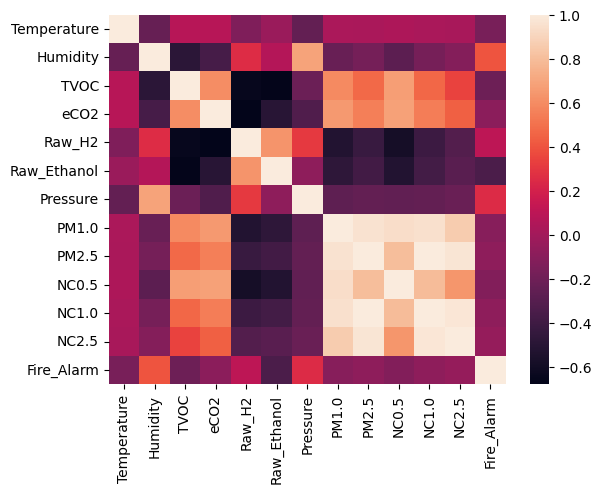

In [136]:
sns.heatmap(train_set.corr(numeric_only = True))
plt.show()

In [137]:
train_set.corr()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
Temperature,1.000000,-0.238081,0.080934,0.078505,-0.140333,-0.035417,-0.249255,0.032693,0.026579,0.036309,0.026064,0.019740,-0.163384
Humidity,-0.238081,1.000000,-0.485137,-0.370216,0.252846,0.066486,0.690161,-0.233247,-0.175432,-0.275708,-0.170806,-0.115710,0.397123
TVOC,0.080934,-0.485137,1.000000,0.601624,-0.652902,-0.672761,-0.217595,0.593089,0.474083,0.668171,0.464200,0.343804,-0.211046
eCO2,0.078505,-0.370216,0.601624,1.000000,-0.679608,-0.501463,-0.327683,0.645757,0.552871,0.684418,0.544574,0.439299,-0.094535
Raw_H2,-0.140333,0.252846,-0.652902,-0.679608,1.000000,0.628097,0.308569,-0.522954,-0.424456,-0.581601,-0.416174,-0.314542,0.106201
Raw_Ethanol,-0.035417,0.066486,-0.672761,-0.501463,0.628097,1.000000,-0.077239,-0.474496,-0.387926,-0.524418,-0.380599,-0.290356,-0.346068
Pressure,-0.249255,0.690161,-0.217595,-0.327683,0.308569,-0.077239,1.000000,-0.267641,-0.252741,-0.255951,-0.250886,-0.223856,0.247576
PM1.0,0.032693,-0.233247,0.593089,0.645757,-0.522954,-0.474496,-0.267641,1.000000,0.957490,0.940865,0.951442,0.859710,-0.107519
PM2.5,0.026579,-0.175432,0.474083,0.552871,-0.424456,-0.387926,-0.252741,0.957490,1.000000,0.803143,0.999794,0.970507,-0.082193
NC0.5,0.036309,-0.275708,0.668171,0.684418,-0.581601,-0.524418,-0.255951,0.940865,0.803143,1.000000,0.790893,0.635828,-0.125538


#### Checking Imbalance & Treatment SMOTE

In [138]:
train_set[target].value_counts()

1    31330
0    12511
Name: Fire_Alarm, dtype: int64

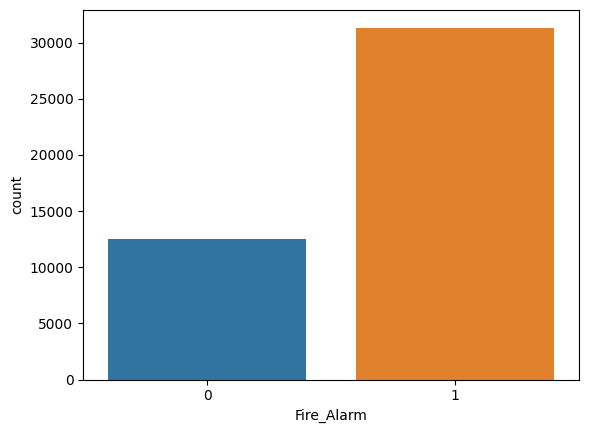

In [139]:
sns.countplot(data=train_set, x=target)
plt.show()

> data target terlihat imbalance --> lakukan treatment imbalance data SMOTE

>Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any >increase in the variety of training examples.

>Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

>SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same >class) near each other, it creates a third artificial one, bang in the middle of the original two.

In [140]:
sm = SMOTE(random_state = 112)
x_sm, y_sm = sm.fit_resample(train_set.drop(target, axis = 1), train_set[target])
train_set_sm = pd.concat([x_sm, y_sm], axis = 1)

In [141]:
train_set_sm[target].value_counts()

1    31330
0    31330
Name: Fire_Alarm, dtype: int64

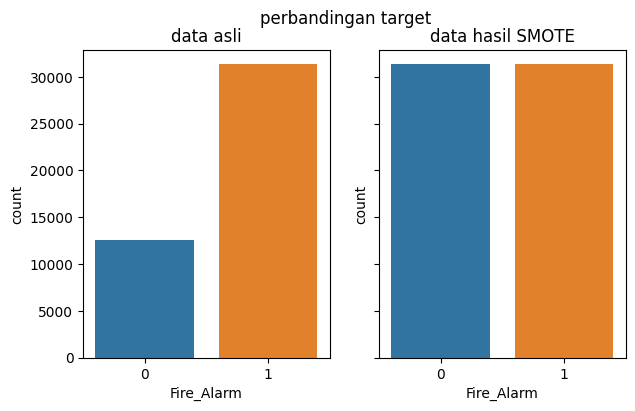

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,4), sharey=True)
fig.suptitle('perbandingan target')
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_sm, x=target, ax=ax[1])
plt.show()

In [143]:
train_set[target].value_counts()

1    31330
0    12511
Name: Fire_Alarm, dtype: int64

### Outlier

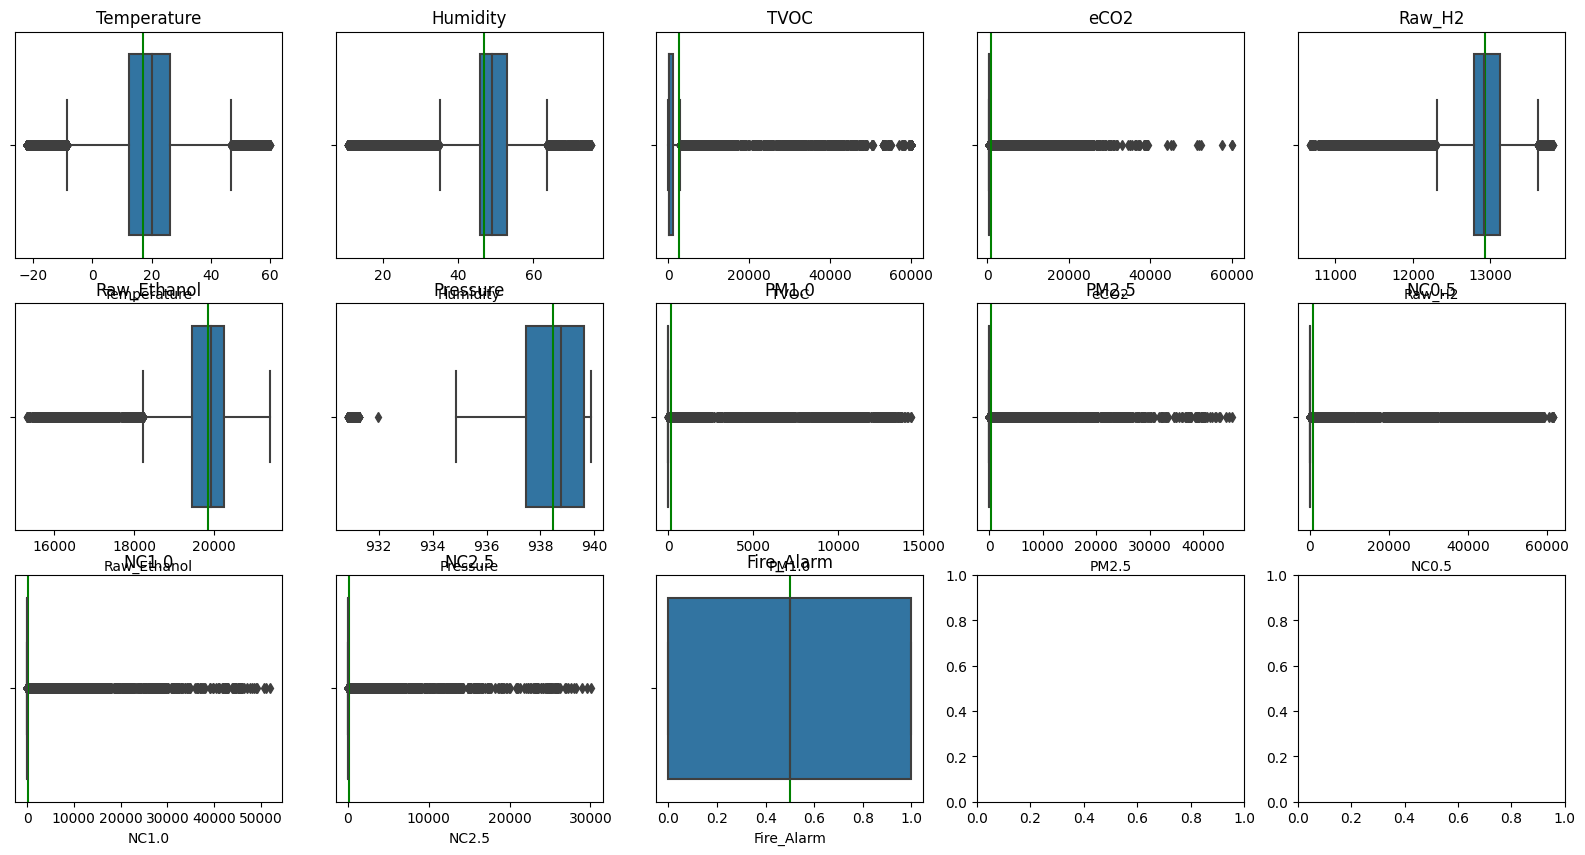

In [144]:
# Checking boxplot
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
for j,i in enumerate(train_set_sm.columns):
    sns.boxplot(data=train_set_sm, x=i, ax=ax[j//5,j%5], hue=target)
    ax[j//5, j%5].axvline(train_set_sm[i].mean(), 0, 1, color = 'g')
    ax[j//5, j%5].set_title(i)
plt.show()

> dari kedua boxplot, terlihat bahwa banyak outlier.

In [145]:
train_set_sm.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire_Alarm'],
      dtype='object')

In [146]:
train_set_sm_clean=pd.DataFrame()
for i in train_set_sm.columns:
    q1 = train_set_sm[i].quantile(0.25)
    q3 = train_set_sm[i].quantile(0.75)
    iqr = q3-q1
    a = q1-(1.5*iqr)
    b = q3+(1.5*iqr)
    # r = train_set_sm[(train_set_sm[i]>a) & (train_set_sm[i]<b)]
    r = train_set_sm[(train_set_sm[i]>a) & (train_set_sm[i]<b)]
    train_set_sm_clean = pd.concat([train_set_sm_clean,r])
duplicated_index = train_set_sm_clean.index.value_counts()
used_index = duplicated_index[duplicated_index==13].index
train_set_sm_clean = train_set_sm_clean.loc[used_index].drop_duplicates()
train_set_sm_clean

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
0,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
40392,26.990,47.68,1329,402,12971,19394,938.749,1.73,1.80,11.90,1.856,0.042,1
40379,18.050,52.88,97,400,13192,20078,939.665,1.06,1.10,7.29,1.137,0.026,0
40380,26.200,51.57,1270,400,12971,19408,938.725,1.76,1.83,12.13,1.892,0.043,1
40381,28.430,42.97,152,431,12774,20562,937.356,1.96,2.04,13.50,2.105,0.048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,8.687,46.95,48,411,12797,20714,937.534,2.15,2.23,14.79,2.306,0.052,0
774,26.800,48.28,1310,400,12977,19405,938.709,1.76,1.83,12.15,1.894,0.043,1
18944,12.596,53.76,1115,400,12898,19452,938.748,1.79,1.86,12.32,1.922,0.043,1
21139,20.920,51.16,350,400,13069,19916,939.268,0.44,0.46,3.02,0.471,0.011,1


### Distribution

In [147]:
train_set.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire_Alarm'],
      dtype='object')

#### Temperature

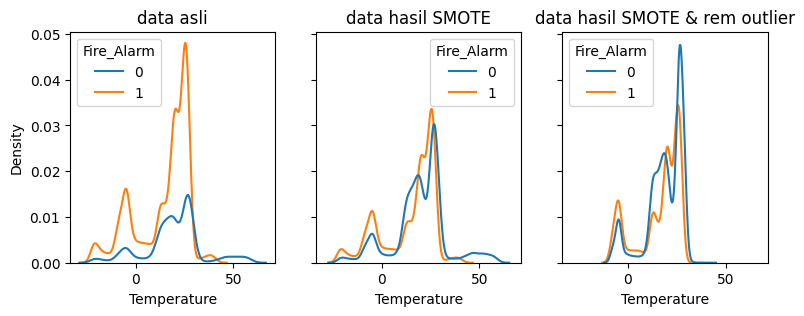

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='Temperature', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='Temperature', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='Temperature', hue='Fire_Alarm', ax=ax[2])
plt.show()

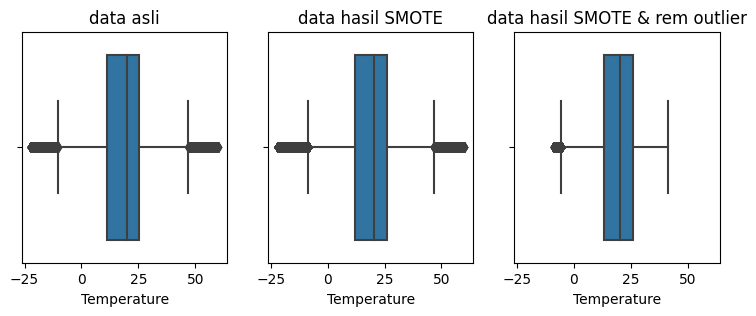

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='Temperature', ax=ax[0])
sns.boxplot(data=train_set_sm, x='Temperature', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='Temperature', ax=ax[2])
plt.show()

#### Humidity

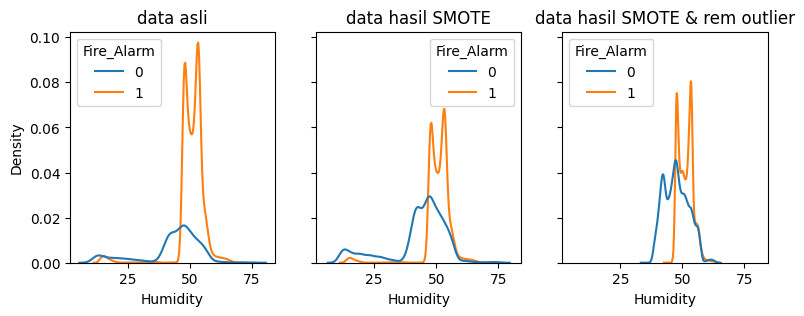

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='Humidity', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='Humidity', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='Humidity', hue='Fire_Alarm', ax=ax[2])
plt.show()

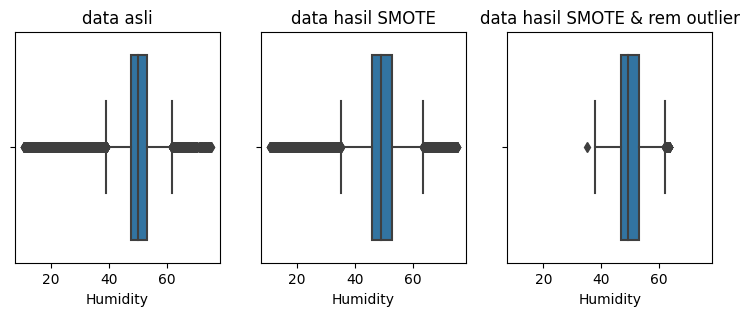

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='Humidity', ax=ax[0])
sns.boxplot(data=train_set_sm, x='Humidity', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='Humidity', ax=ax[2])
plt.show()

#### TVOC

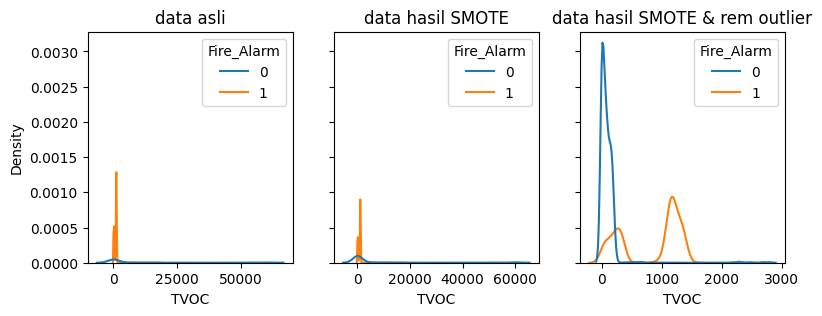

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='TVOC', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='TVOC', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='TVOC', hue='Fire_Alarm', ax=ax[2])
plt.show()

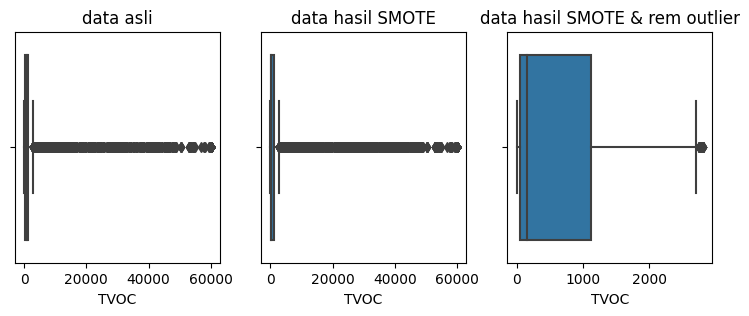

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='TVOC', ax=ax[0])
sns.boxplot(data=train_set_sm, x='TVOC', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='TVOC', ax=ax[2])
plt.show()

#### eCO2

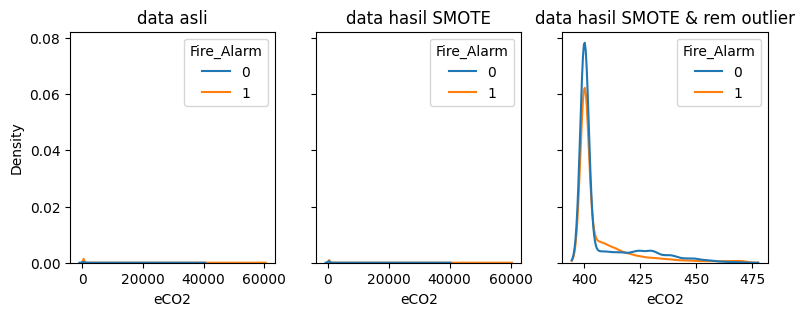

In [154]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='eCO2', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='eCO2', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='eCO2', hue='Fire_Alarm', ax=ax[2])
plt.show()

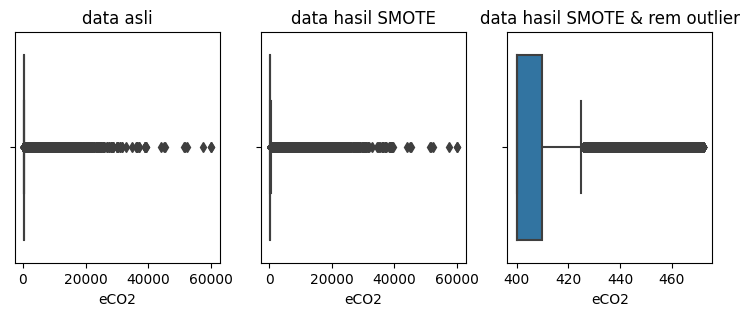

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='eCO2', ax=ax[0])
sns.boxplot(data=train_set_sm, x='eCO2', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='eCO2', ax=ax[2])
plt.show()

#### Raw_H2

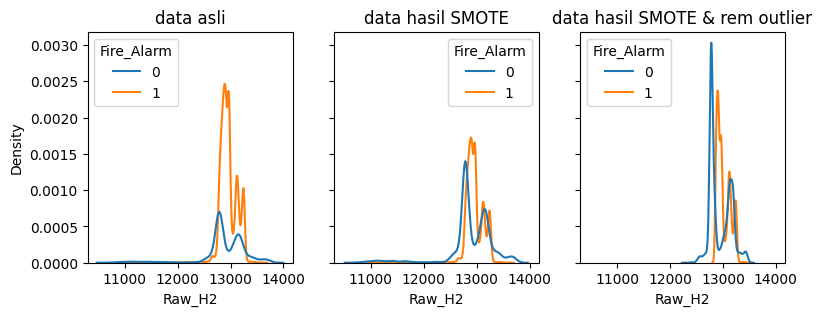

In [156]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='Raw_H2', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='Raw_H2', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='Raw_H2', hue='Fire_Alarm', ax=ax[2])
plt.show()

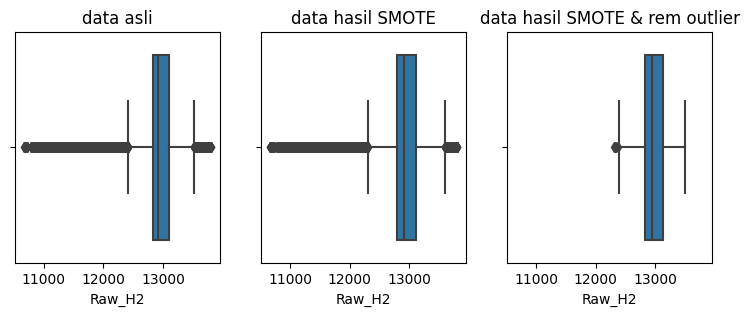

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='Raw_H2', ax=ax[0])
sns.boxplot(data=train_set_sm, x='Raw_H2', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='Raw_H2', ax=ax[2])
plt.show()

#### Raw_Ethanol

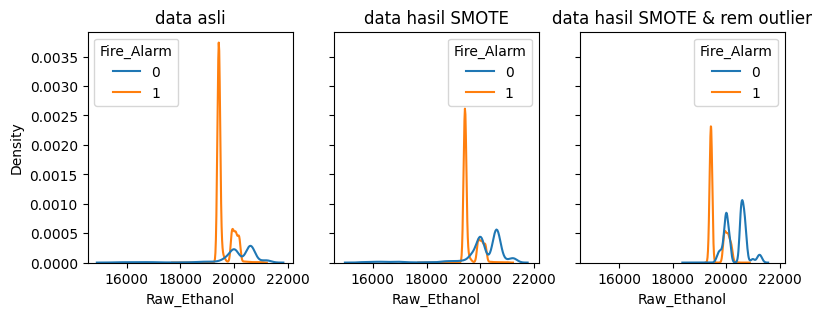

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='Raw_Ethanol', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='Raw_Ethanol', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='Raw_Ethanol', hue='Fire_Alarm', ax=ax[2])
plt.show()

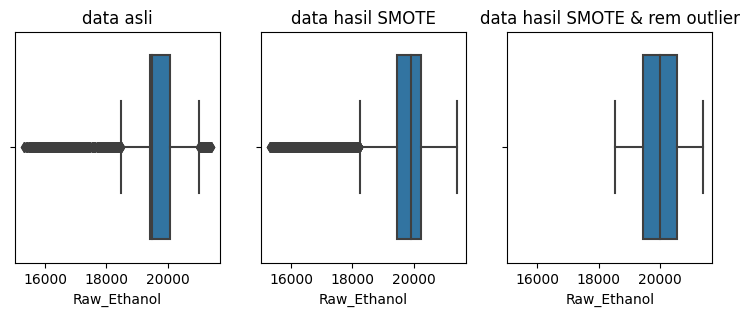

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='Raw_Ethanol', ax=ax[0])
sns.boxplot(data=train_set_sm, x='Raw_Ethanol', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='Raw_Ethanol', ax=ax[2])
plt.show()

#### Pressure

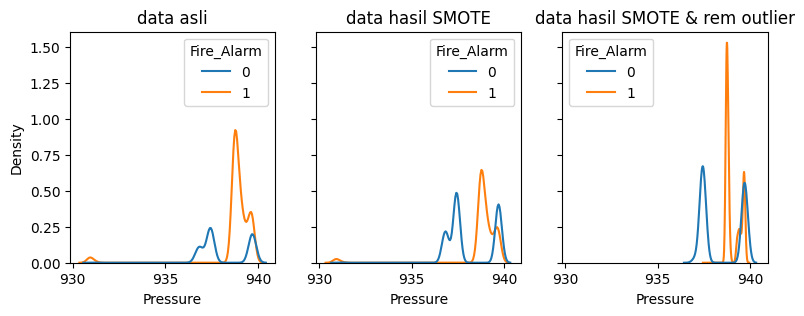

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='Pressure', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='Pressure', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='Pressure', hue='Fire_Alarm', ax=ax[2])
plt.show()

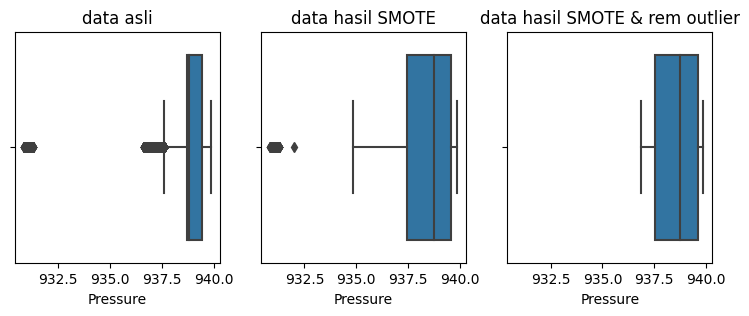

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='Pressure', ax=ax[0])
sns.boxplot(data=train_set_sm, x='Pressure', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='Pressure', ax=ax[2])
plt.show()

#### PM1.0

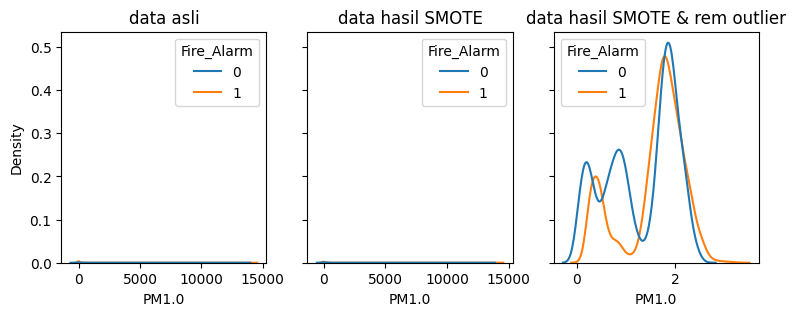

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='PM1.0', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='PM1.0', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='PM1.0', hue='Fire_Alarm', ax=ax[2])
plt.show()

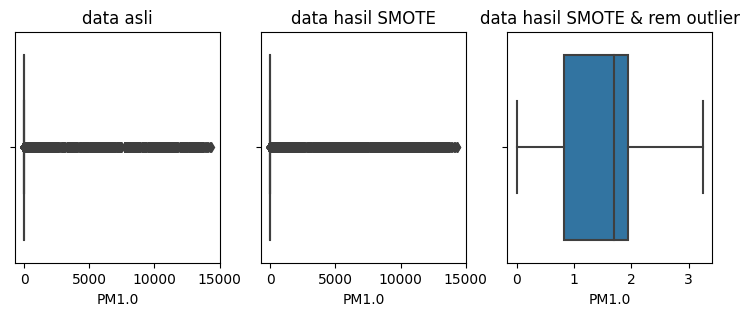

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='PM1.0', ax=ax[0])
sns.boxplot(data=train_set_sm, x='PM1.0', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='PM1.0', ax=ax[2])
plt.show()

#### PM2.5

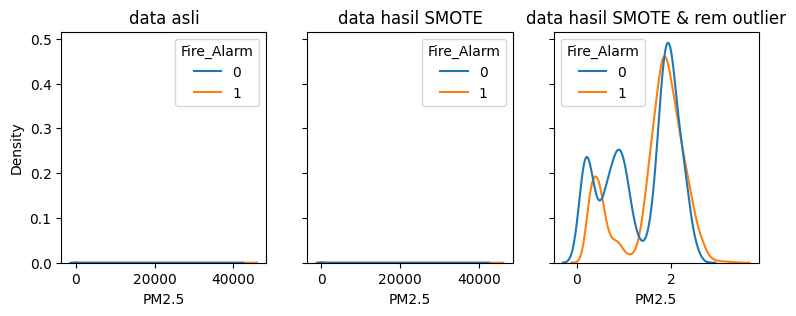

In [164]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='PM2.5', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='PM2.5', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='PM2.5', hue='Fire_Alarm', ax=ax[2])
plt.show()

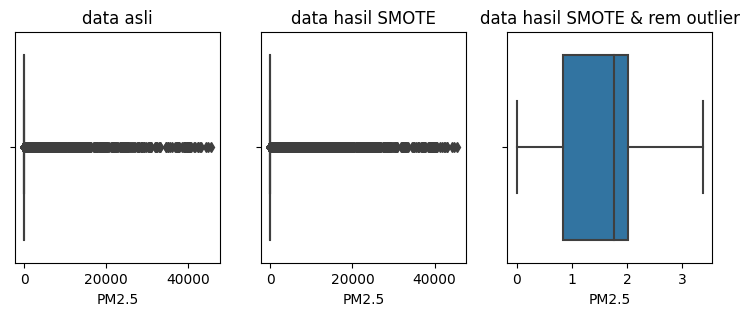

In [165]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='PM2.5', ax=ax[0])
sns.boxplot(data=train_set_sm, x='PM2.5', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='PM2.5', ax=ax[2])
plt.show()

#### NC0.5

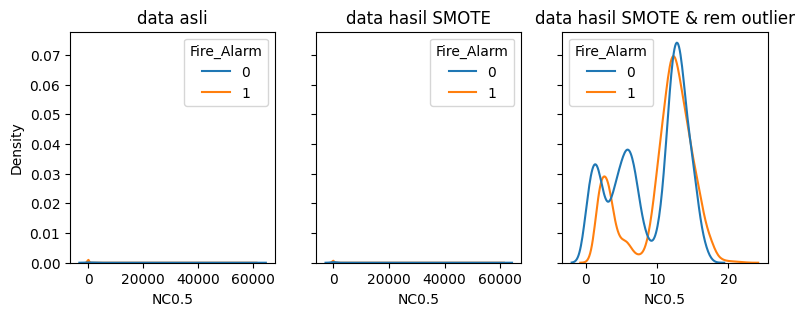

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='NC0.5', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='NC0.5', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='NC0.5', hue='Fire_Alarm', ax=ax[2])
plt.show()

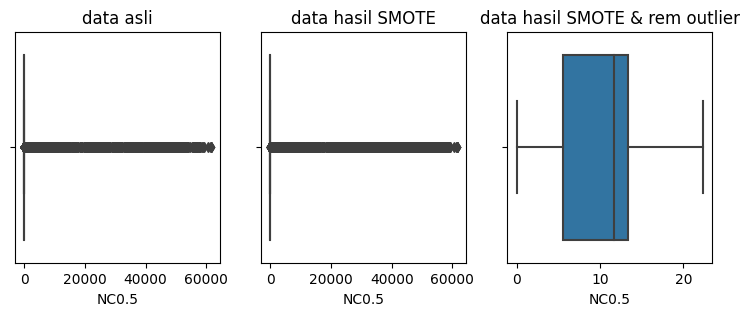

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='NC0.5', ax=ax[0])
sns.boxplot(data=train_set_sm, x='NC0.5', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='NC0.5', ax=ax[2])
plt.show()

#### NC1.0

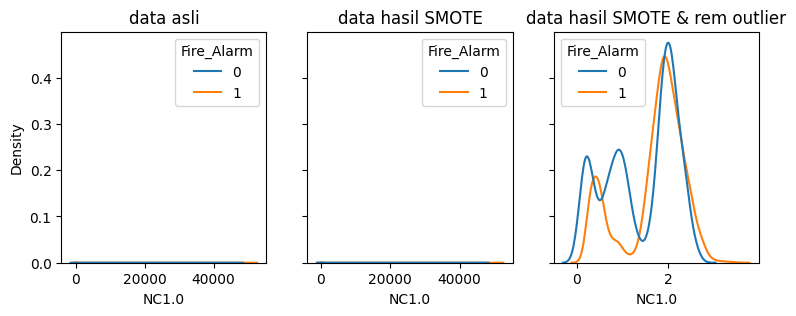

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='NC1.0', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='NC1.0', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='NC1.0', hue='Fire_Alarm', ax=ax[2])
plt.show()

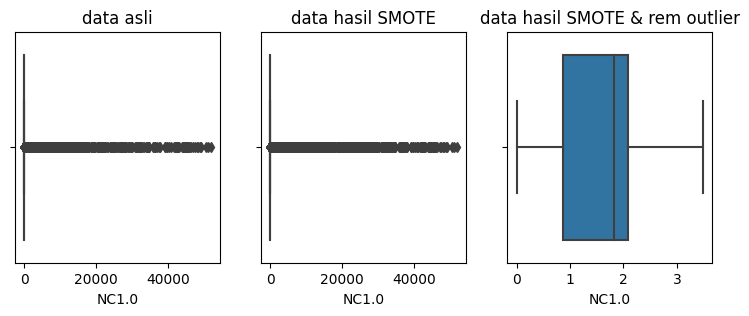

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='NC1.0', ax=ax[0])
sns.boxplot(data=train_set_sm, x='NC1.0', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='NC1.0', ax=ax[2])
plt.show()

#### NC2.5

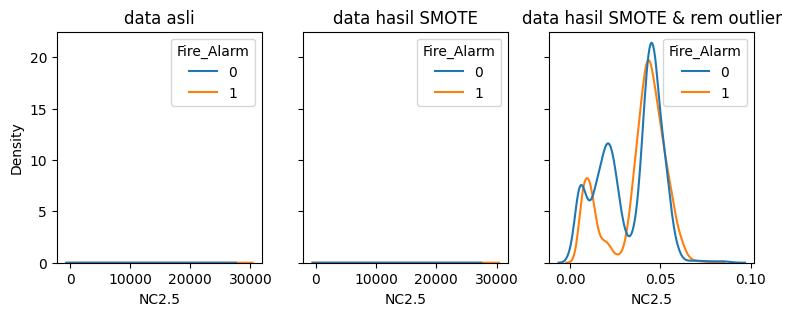

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.kdeplot(data=train_set, x='NC2.5', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='NC2.5', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_sm_clean, x='NC2.5', hue='Fire_Alarm', ax=ax[2])
plt.show()

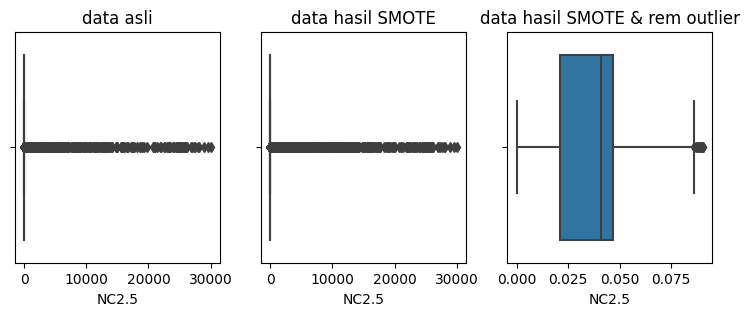

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & rem outlier')

sns.boxplot(data=train_set, x='NC2.5', ax=ax[0])
sns.boxplot(data=train_set_sm, x='NC2.5', ax=ax[1])
sns.boxplot(data=train_set_sm_clean, x='NC2.5', ax=ax[2])
plt.show()

### Correlation Spearman

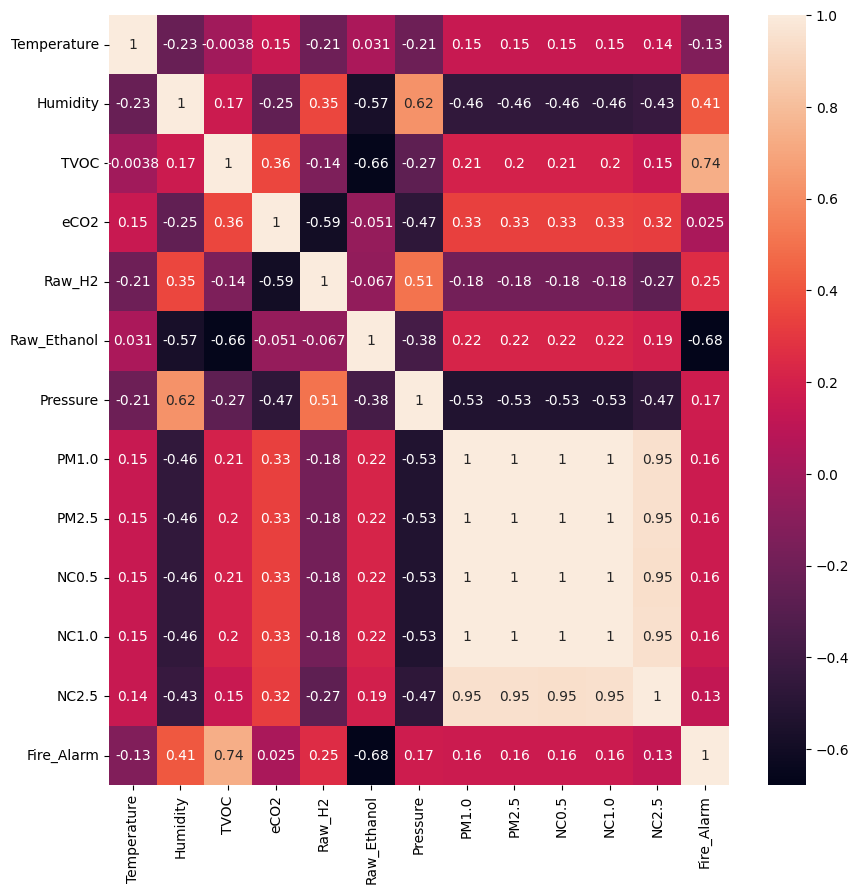

In [172]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_set_sm_clean.corr(method='spearman', numeric_only = True), annot=True, ax=ax)
plt.show()

> Karena PM1.0, PM2.5, NC0.5, NC1.0, dan NC2.5 mempunyai nilai corelation 0.95-1 yg artinya mempunyai korelasi hampir sempurna, sehingga bs di wakilkan oleh 1 predictor saja. maka akan di drop, di sisakan hanya 1 saja, misal PM1.0

In [173]:
def correlated(x):
    train_corr = train_set_sm_clean.corr()
    print(x.upper())
    print('------------')
    tmp = train_corr[(train_corr[x]>=0.5) | (train_corr[x]<=-0.5)][x]
    return tmp

a =  train_set_sm_clean.corr()
for col in a.columns:
    print(correlated(col))
    print()

TEMPERATURE
------------
Temperature    1.0
Name: Temperature, dtype: float64

HUMIDITY
------------
Humidity       1.000000
Raw_Ethanol   -0.599992
Pressure       0.685013
Name: Humidity, dtype: float64

TVOC
------------
TVOC           1.000000
Raw_Ethanol   -0.750807
Fire_Alarm     0.702615
Name: TVOC, dtype: float64

ECO2
------------
eCO2    1.0
Name: eCO2, dtype: float64

RAW_H2
------------
Raw_H2    1.0
Name: Raw_H2, dtype: float64

RAW_ETHANOL
------------
Humidity      -0.599992
TVOC          -0.750807
Raw_Ethanol    1.000000
Pressure      -0.582152
Fire_Alarm    -0.700384
Name: Raw_Ethanol, dtype: float64

PRESSURE
------------
Humidity       0.685013
Raw_Ethanol   -0.582152
Pressure       1.000000
PM1.0         -0.607278
PM2.5         -0.607235
NC0.5         -0.607323
NC1.0         -0.607238
NC2.5         -0.557882
Name: Pressure, dtype: float64

PM1.0
------------
Pressure   -0.607278
PM1.0       1.000000
PM2.5       0.999943
NC0.5       0.999986
NC1.0       0.999937
NC2.5

#### Remove corr yang kuat

In [174]:
new_cols = ['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol', 'Pressure', 'PM1.0', 'Fire_Alarm']
train_set_sm_clean = train_set_sm_clean[new_cols].copy()
train_set_sm_clean

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,Fire_Alarm
0,27.120,47.37,1228,405,12909,19428,938.728,1.66,1
40392,26.990,47.68,1329,402,12971,19394,938.749,1.73,1
40379,18.050,52.88,97,400,13192,20078,939.665,1.06,0
40380,26.200,51.57,1270,400,12971,19408,938.725,1.76,1
40381,28.430,42.97,152,431,12774,20562,937.356,1.96,0
...,...,...,...,...,...,...,...,...,...
2003,8.687,46.95,48,411,12797,20714,937.534,2.15,0
774,26.800,48.28,1310,400,12977,19405,938.709,1.76,1
18944,12.596,53.76,1115,400,12898,19452,938.748,1.79,1
21139,20.920,51.16,350,400,13069,19916,939.268,0.44,1


### Pairplot

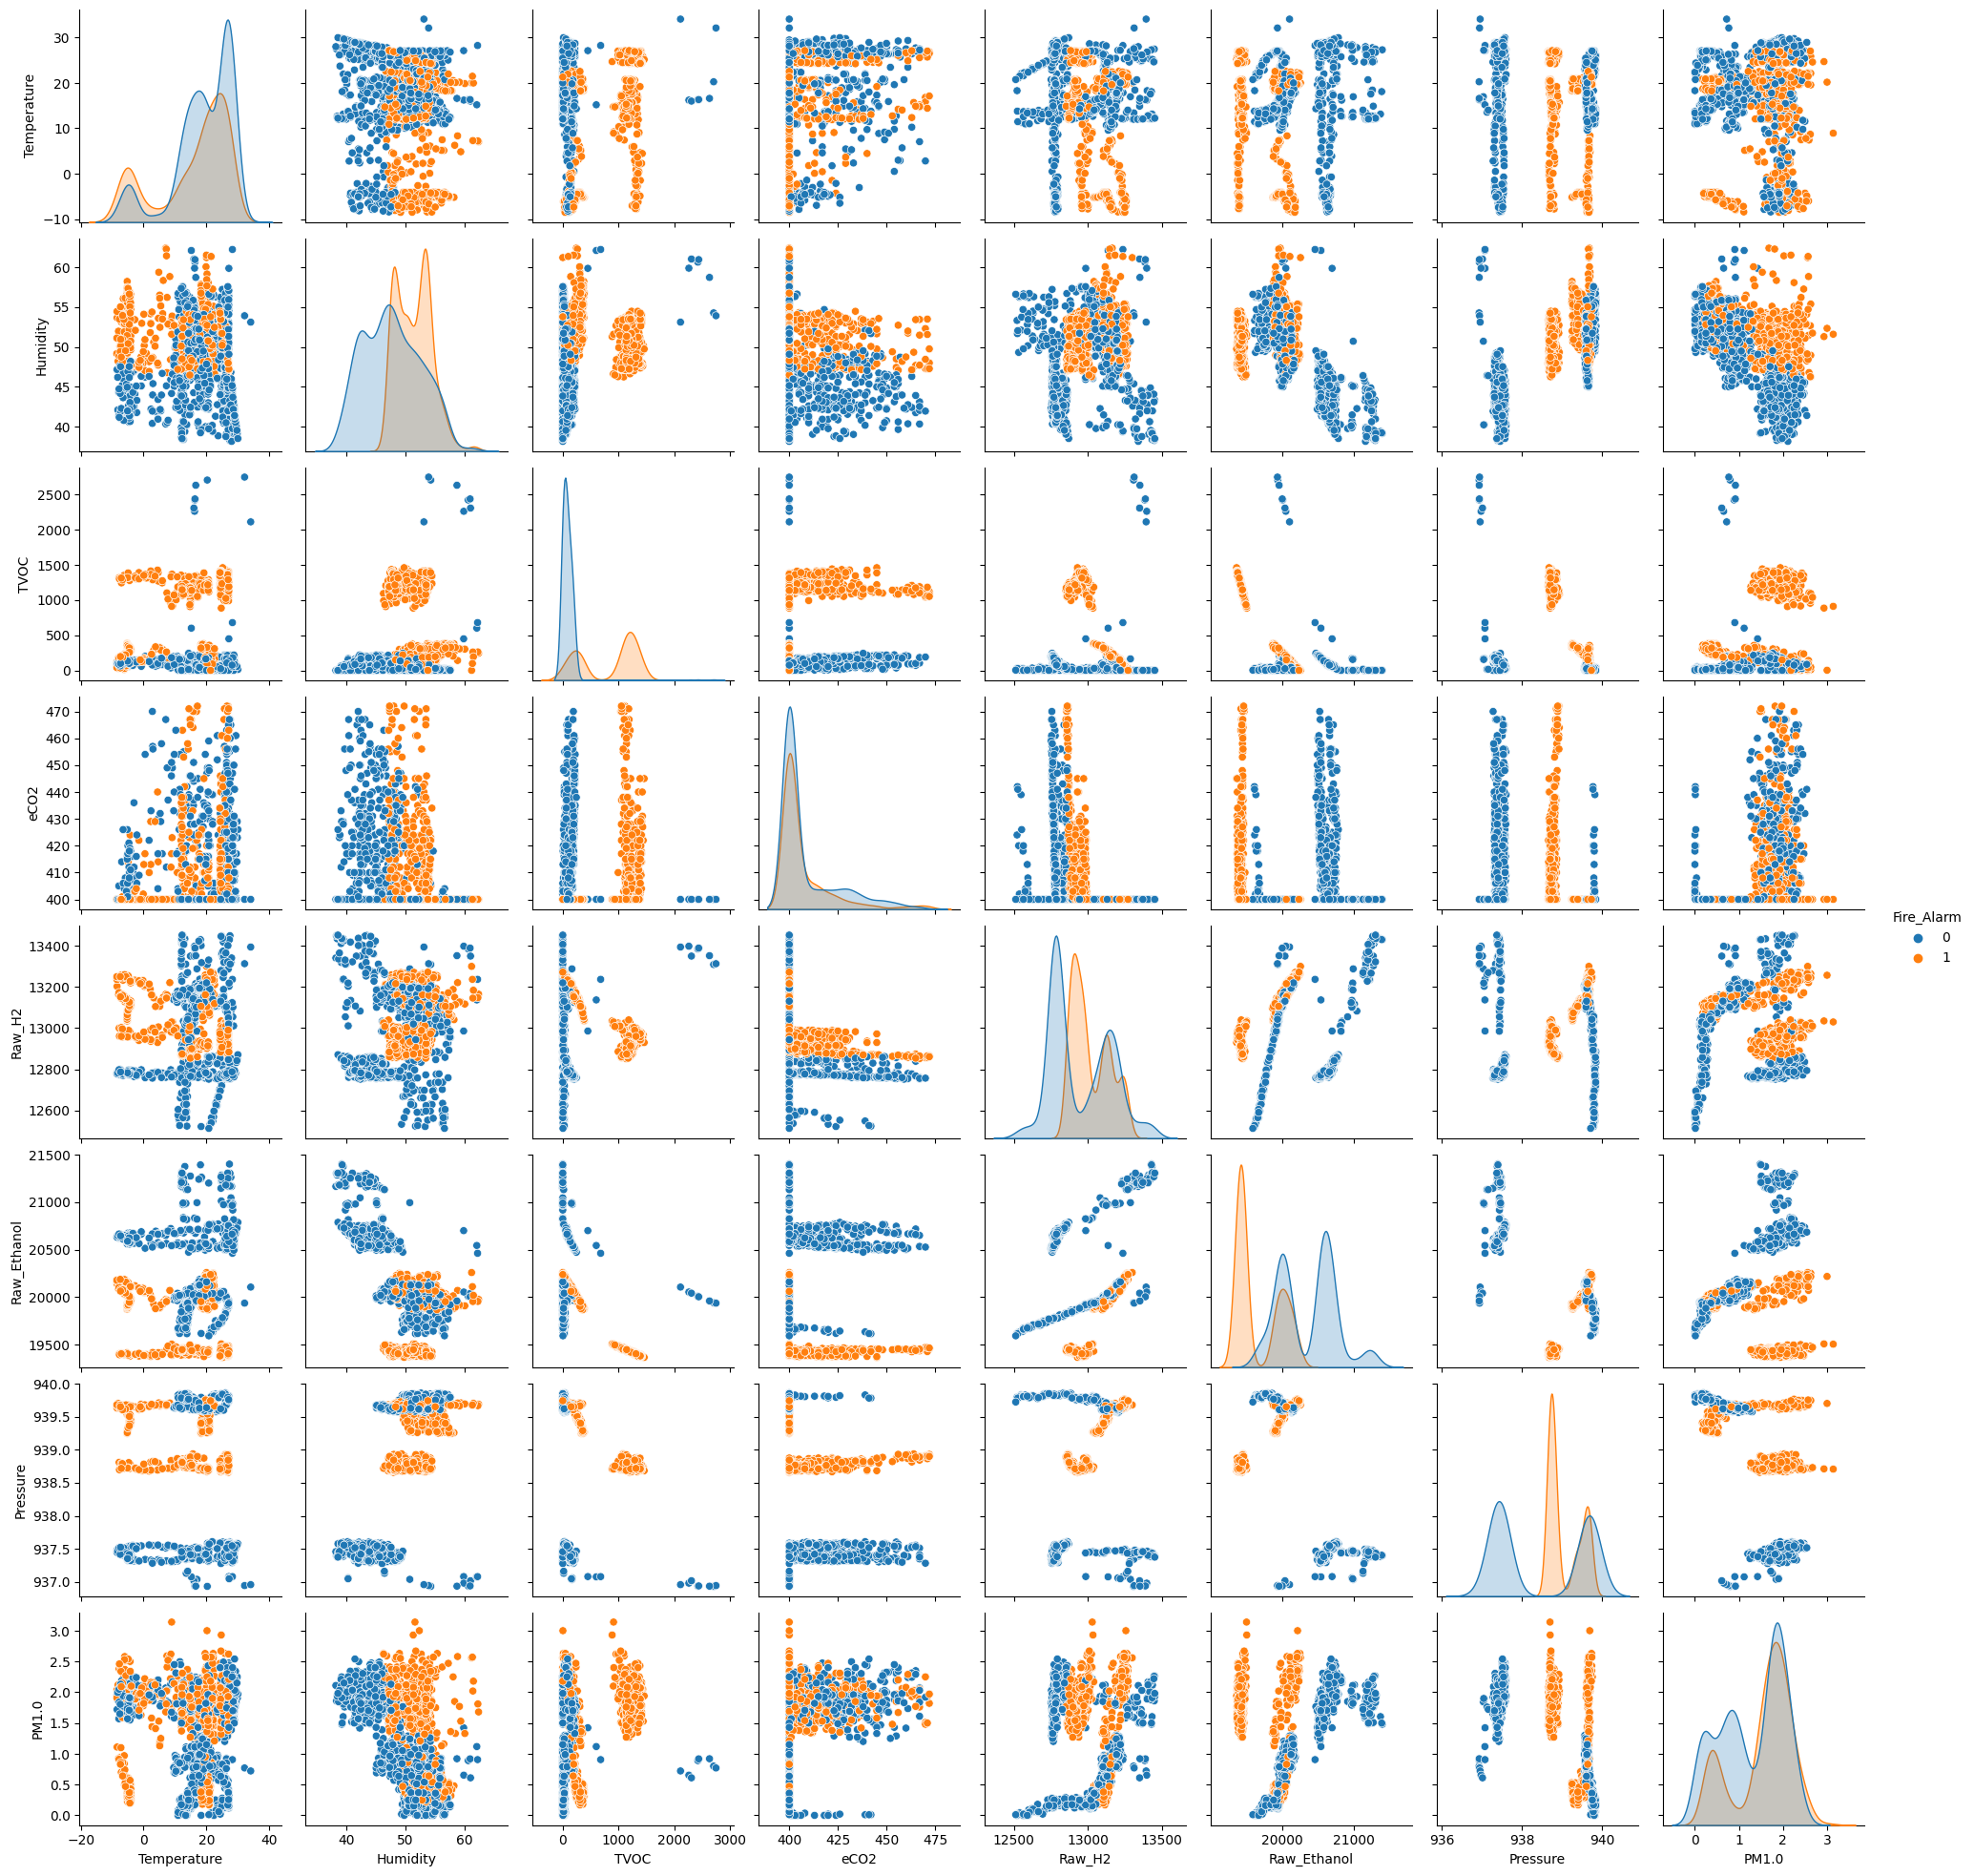

In [175]:
sns.pairplot(train_set_sm_clean.sample(2000), hue=target)
plt.show()

In [176]:
train_set_sm_clean.describe()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,Fire_Alarm
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,17.610430,49.304615,436.613201,407.563010,12977.059836,20039.893136,938.710521,1.431622,0.457562
std,10.459760,4.560243,527.094737,14.111789,175.507645,505.881437,0.932293,0.688125,0.498201
min,-8.572000,35.195973,0.000000,400.000000,12306.000000,18520.000000,936.865138,0.000000,0.000000
25%,13.419500,46.833683,46.000000,400.000000,12828.000000,19451.000000,937.532000,0.820000,0.000000
50%,20.343000,49.398132,157.000000,400.000000,12951.000000,20007.000000,938.770000,1.700000,0.000000
75%,26.003335,52.960000,1118.000000,410.000000,13127.000000,20546.000000,939.630000,1.944329,1.000000
max,41.246102,63.530000,2808.000000,472.000000,13505.000000,21401.000000,939.861000,3.250000,1.000000


In [177]:
x_train = train_set_sm_clean.drop(target, axis=1)
y_train = train_set_sm_clean[target].copy()

In [178]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

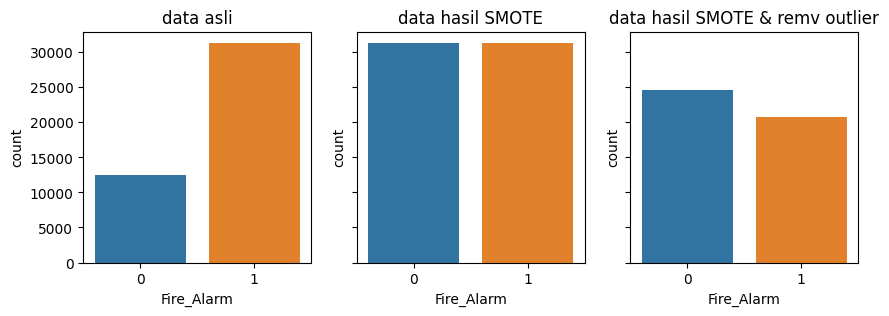

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')
ax[2].set_title('data hasil SMOTE & remv outlier')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_sm, x=target, ax=ax[1])
sns.countplot(data=train_set_sm_clean, x=target, ax=ax[2])
plt.show()

In [180]:
print(train_set.shape)
print(train_set_sm.shape)
print(train_set_sm_clean.shape)

(43841, 13)
(62660, 13)
(45207, 9)
